#  `phase_fraction`

Calculates the fraction of each phase (unique label) in an image. This method has varieties of applications including phase fraction in a porous medium where different materials are labeled in the image.

In [1]:
import matplotlib.pyplot as plt
import porespy as ps
import numpy as np
from porespy.filters import fftmorphology
from skimage.morphology import disk
import inspect
inspect.signature(ps.metrics.phase_fraction)

<Signature (im, normed=True)>

## `im`
The input image containing the phase(s). Let's generate a test image containing three phases:

labels of phases are [0. 1. 2.]


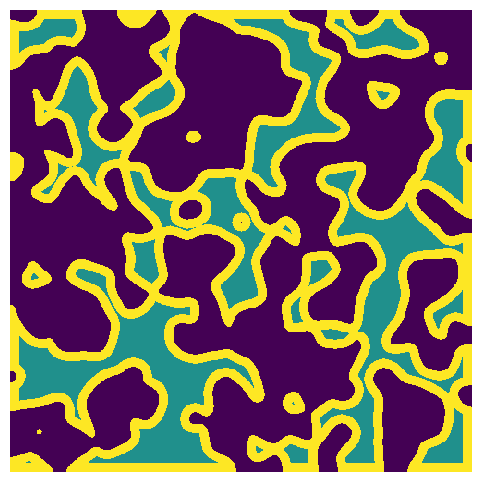

In [2]:
np.random.seed(10)
im = ps.generators.blobs(shape=[500, 500])
im_close = fftmorphology(im=im, strel=disk(10), mode='erosion')
pad = im*1.0-im_close*1.0
phases = im + pad
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(phases, origin='lower', interpolation='none')
ax.axis(False);
labels=np.unique(phases)
print('labels of phases are',labels)

The generated image includes three phases labeled as 1,2,3. Note that the label values can by any unique number. Given the input image, the `phase_fraction` method returns a dictionary containing the label and the fraction of each phase in the image. The fraction of each phase is calculated by normalizing the number of voxels in each phase by the total number of voxels in the image.

In [3]:
phase_fracs = ps.metrics.phase_fraction(phases)
print(phase_fracs)

{0.0: 0.512432, 1.0: 0.187, 2.0: 0.300568}


## `normed`

By default the `phase_fraction` method returns the fraction of phases. We can calculate the number of voxels in each phase by choosing `normed=False`:

In [4]:
phase_voxel_num = ps.metrics.phase_fraction(phases, normed=False)
print(phase_voxel_num)

{0.0: 128108, 1.0: 46750, 2.0: 75142}
